In [23]:
#Importing all the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [7]:
#Importing the data from the file
moviesData = pd.read_csv('/content/movies.csv')
ratingsData = pd.read_csv('/content/ratings.csv')
tagsData = pd.read_csv('/content/tags.csv')

In [8]:
#Merging the ratings and movies data together based on movieid
data = pd.merge(ratingsData[['userId', 'movieId', 'rating']], moviesData[['movieId', 'title']], on='movieId', how='left')
data.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,1,3,4.0,Grumpier Old Men (1995)
2,1,6,4.0,Heat (1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,"Usual Suspects, The (1995)"


Feature Engineering

In [10]:
#Building user-item matrix
MatrixData=data.drop(['title'], axis=1)
MovieUserMatrix = MatrixData.pivot_table(index='movieId',columns='userId',values='rating')
MovieUserMatrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Fiiling -1 with all nan's
MovieUserMatrix_Y=MovieUserMatrix.fillna(-1)
MovieUserMatrix_Y

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,-1.0,-1.0,-1.0,4.0,-1.0,4.5,-1.0,-1.0,-1.0,...,4.0,-1.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,-1.0,4.0,-1.0,-1.0,...,-1.0,4.0,-1.0,5.0,3.5,-1.0,-1.0,2.0,-1.0,-1.0
3,4.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
193583,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
193585,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [12]:
#Transformation of user-item matrix into matrix R(binary-values indicator matrix)
MovieUserMatrix_R=MovieUserMatrix.copy()
MovieUserMatrix_R=MovieUserMatrix_R.where(~MovieUserMatrix_R.notna(), 1)
MovieUserMatrix_R=MovieUserMatrix_R.fillna(0)
MovieUserMatrix_R

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#sanity check
MovieUserMatrix_Y.shape==MovieUserMatrix_R.shape

True

In [14]:
#getting values out of pandas dataframe into numpy-array because my alogorithm accept numpy-array as parameter
Y=MovieUserMatrix_Y.values
R=MovieUserMatrix_R.values

Hybrid Recommendation Approach

1.Collabrative Filtering

In [16]:
#Implementation of Collaborative filtering Cost function and gradient, regularized and non regularized
def  cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda):
    # Unfold the params
    X = params[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = params[num_movies*num_features:].reshape(num_users,num_features)

    predictions =  np.dot(X,Theta.T)
    err = (predictions - Y)
    J = 1/2 * np.sum((err**2) * R)# multiplying by R will consider only those values for which value of (i,j)=r(i,j)=1

    #compute regularized cost function
    reg_X =  Lambda/2 * np.sum(Theta**2)
    reg_Theta = Lambda/2 *np.sum(X**2)
    reg_J = J + reg_X + reg_Theta

    # Compute gradient
    X_grad = np.dot(err*R,Theta)
    Theta_grad = np.dot((err*R).T,X)
    grad = np.append(X_grad.flatten(),Theta_grad.flatten()) #flattening calculated gradients of 4*3 dim into 12 real number one dim of vector for optimization algo since optimization algorithms deals with vectos not matrix

    # Compute regularized gradient
    reg_X_grad = X_grad + Lambda*X
    reg_Theta_grad = Theta_grad + Lambda*Theta
    reg_grad = np.append(reg_X_grad.flatten(),reg_Theta_grad.flatten())
    #, reg_J, reg_grad

    return J, grad, reg_J, reg_grad

In [17]:
#Gradient descent implementation
def gradientDescent(initial_parameters,Y,R,num_users,num_movies,num_features,alpha,num_iters,Lambda):
    # unfold the parameters
    X = initial_parameters[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = initial_parameters[num_movies*num_features:].reshape(num_users,num_features)

    J_history =[]

    for i in range(num_iters):
        params = np.append(X.flatten(),Theta.flatten())
        cost, grad = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda)[2:]

        # unfold grad
        X_grad = grad[:num_movies*num_features].reshape(num_movies,num_features)
        Theta_grad = grad[num_movies*num_features:].reshape(num_users,num_features)
        X = X - (alpha * X_grad)
        Theta = Theta - (alpha * Theta_grad)
        J_history.append(cost)

    paramsFinal = np.append(X.flatten(),Theta.flatten())
    return paramsFinal , J_history

In [18]:
def normalizeRatings(Y, R):
    m,n = Y.shape[0], Y.shape[1]
    Ymean = np.zeros((m,1))
    Ynorm = np.zeros((m,n))

    for i in range(m):
        Ymean[i] = np.sum(Y[i,:])/np.count_nonzero(R[i,:])
        Ynorm[i,R[i,:]==1] = Y[i,R[i,:]==1] - Ymean[i]
    return Ynorm, Ymean

2.Content-based filtering

In [19]:
def computeCost(X, y, theta):
    m=y.size
    s=np.dot(X,theta)-y
    j=(1/(2*m))*(np.dot(np.transpose(s),s))
    return j


In [20]:
def CBgradientDescent(X, y, theta, alpha, num_iters):
    m = float(y.shape[0])
    theta = theta.copy()
    for i in range(num_iters):
        theta=(theta)-(alpha/m)*(np.dot(np.transpose((np.dot(X,theta)-y)),X))
    return theta

3.Prediction

In [21]:
def prediction(X,my_ratings,moviesdataset):
    out_arr = my_ratings[np.nonzero(my_ratings)]
    out_arr=out_arr.reshape(-1,1)
    idx = np.where(my_ratings)[0]
    X_1=[X[x] for x in idx]
    X_1=np.array(X_1)
    y=out_arr
    y=np.reshape(y, -1)
    theta =CBgradientDescent(X_1,y,np.zeros((100)),0.001,4000)
    #mean=np.reshape(Ymean, -1)
    p = X @ theta.T
    #p=p+mean
    p=np.reshape(p, -1)
    predictedData=moviesdataset.copy()
    predictedData['Pridiction']=p
    sorted_data=predictedData.sort_values(by=['Pridiction'],ascending=False)
    return sorted_data[:40]


Training and Evaluation

In [22]:
#train-test-split
def train_test_split(Yratings,Rratings):
    Ytest = np.zeros(Yratings.shape)
    Ytrain = Yratings.copy()
    Rtest = np.zeros(Rratings.shape)
    Rtrain = Rratings.copy()

    for user in range(Yratings.shape[0]):
        try:
            test_ratings = np.random.choice(Yratings[user, :].nonzero()[0],
                                            size=10,
                                            replace=False)
            Ytrain[user, test_ratings] = 0.
            Ytest[user, test_ratings] = Yratings[user, test_ratings]

            Rtrain[user, test_ratings] = 0.
            Rtest[user, test_ratings] = Rratings[user, test_ratings]
        except ValueError:
            test_ratings = np.random.choice(Yratings[user, :].nonzero()[0],
                                            size=10,
                                            replace=True)
            Ytrain[user, test_ratings] = 0.
            Ytest[user, test_ratings] = Yratings[user, test_ratings]

            Rtrain[user, test_ratings] = 0.
            Rtest[user, test_ratings] = Rratings[user, test_ratings]
    # Test and training are truly disjoint
    assert(np.all((Ytrain * Ytest) == 0))
    assert(np.all((Rtrain * Rtest) == 0))
    return Ytrain, Ytest, Rtrain, Rtest

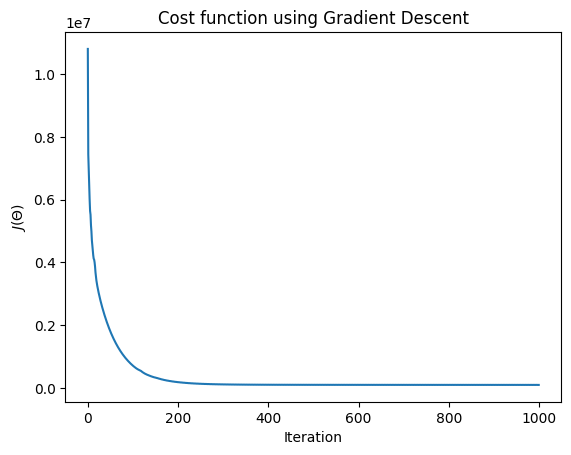

In [24]:
#Train-Test split
Ytrain, Ytest, Rtrain, Rtest = train_test_split(Y,R)
num_users = Ytrain.shape[1]
num_movies = Ytrain.shape[0]
num_features = 100

# Set initial Parameters (Theta,X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)
initial_parameters = np.append(X.flatten(),Theta.flatten())
Lambda = 10

# learns Features for movies and parameters for all users using Collaborative filtering
paramsFinal, J_history = gradientDescent(initial_parameters,Ytrain,Rtrain,num_users,num_movies,num_features,0.001,1000,Lambda)

plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
X = paramsFinal[:num_movies*num_features].reshape(num_movies,num_features)
Theta = paramsFinal[num_movies*num_features:].reshape(num_users,num_features)

Learning curve analysis - MSE metric

In [25]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [26]:
def learningCurve(Ytrain,Rtrain,Ytest,Rtest):
    Y=Ytrain
    R=Rtrain
    test_Y=Ytest
    test_R=Rtest
    train_size_hist=[]
    train_score_hist=[]
    test_size_hist=[]
    test_score_hist=[]
    size_list=[1,100,800,1000,1500,2000,2500,3000,3300,3800,4800,5900,6500,7000,7600,8300,9724]
    for size in size_list:
        Ytrain=Y[:size]
        Rtrain=R[:size]
        Ytest=test_Y[:size]
        Rtest=test_R[:size]
        num_users = Ytrain.shape[1]
        num_movies = Ytrain.shape[0]
        num_features = 100

        # Set initial Parameters (Theta,X)
        X = np.random.randn(num_movies, num_features)
        Theta = np.random.randn(num_users, num_features)
        initial_parameters = np.append(X.flatten(),Theta.flatten())
        Lambda = 10

        # Optimize parameters using Gradient Descent
        paramsFinal, J_history = gradientDescent(initial_parameters,Ytrain,Rtrain,num_users,num_movies,num_features,0.001,1000,Lambda)
        X = paramsFinal[:num_movies*num_features].reshape(num_movies,num_features)
        Theta = paramsFinal[num_movies*num_features:].reshape(num_users,num_features)
        pred = X @ Theta.T
        pred=pred*Rtrain
        actual=Ytrain
        train_size_hist.append(size)
        train_score_hist.append(get_mse(pred, actual))
        pred = X @ Theta.T
        pred=pred*Rtest
        actual=Ytest
        test_size_hist.append(size)
        test_score_hist.append(get_mse(pred, actual))
    return train_size_hist,train_score_hist,test_size_hist,test_score_hist

In [27]:
train_size_hist,train_score_hist,test_size_hist,test_score_hist=learningCurve(Ytrain,Rtrain,Ytest,Rtest)

<ipython-input-28-8f69eea50f6d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


(0.97, 1.05)

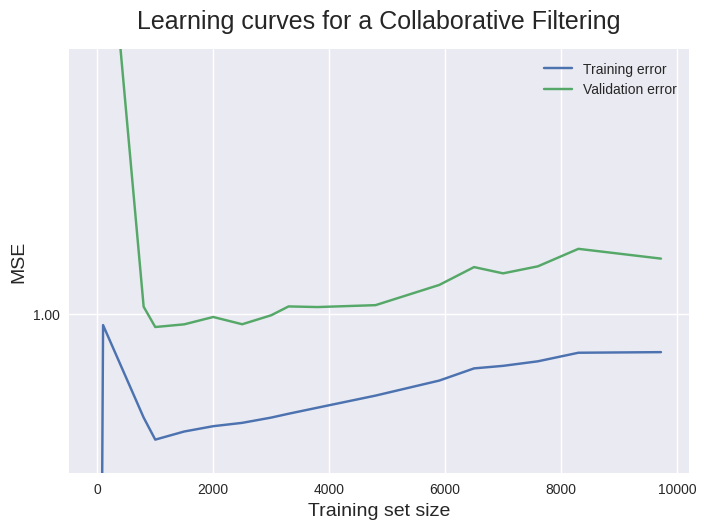

In [28]:
plt.style.use('seaborn')
plt.plot(train_size_hist, train_score_hist, label = 'Training error')
plt.plot(train_size_hist, test_score_hist, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.yticks(np.arange(0,2, 0.25))
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Collaborative Filtering', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.97,1.05)

In [30]:
#cleaning and transforming moviesDataset to use it on web-application
moviesdataset=data.drop(['userId','rating'],axis=1)
moviesdataset=moviesdataset.drop_duplicates()
moviesdataset=moviesdataset.sort_values("movieId")
moviesdataset=moviesdataset.reset_index(drop=True)
moviesdataset["title"] = moviesdataset["title"].str.lower()
moviesdataset["title"] = moviesdataset["title"].str.replace(r"\(.*\)","")
moviesdataset.head()

<ipython-input-30-0156f8152e2a>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  moviesdataset["title"] = moviesdataset["title"].str.replace(r"\(.*\)","")


,movieId,title
0,1,toy story
1,2,jumanji
2,3,grumpier old men
3,4,waiting to exhale
4,5,father of the bride part ii


Testing

In [31]:
# Initialize my ratings
my_ratings = np.zeros((9724,1))

# test rating by web-applicaiton user
my_ratings[0] = 4
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11]= 5
my_ratings[53] = 4
my_ratings[63]= 5
my_ratings[65]= 3
my_ratings[68] = 5
my_ratings[82]= 4
my_ratings[225] = 5
my_ratings[354]= 5

print("New user ratings:\n")
for i in range(len(my_ratings)):
    if my_ratings[i]>0:
        print("Rated",int(my_ratings[i]),"for Movie")
        print((moviesdataset.iloc[i]).title)

New user ratings:

Rated 4 for Movie
toy story 
Rated 3 for Movie
sabrina 
Rated 5 for Movie
dracula: dead and loving it 
Rated 4 for Movie
indian in the cupboard, the 
Rated 5 for Movie
fair game 
Rated 3 for Movie
misérables, les 
Rated 5 for Movie
screamers 
Rated 4 for Movie
vampire in brooklyn 
Rated 2 for Movie
braveheart 
Rated 5 for Movie
little women 
Rated 5 for Movie
above the rim 


<ipython-input-31-a0c2daf847ce>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Rated",int(my_ratings[i]),"for Movie")


In [32]:
# top-N-movies
prediction(X,my_ratings,moviesdataset)

,movieId,title,Pridiction
322,364,"lion king, the",4.992464
461,527,schindler's list,4.981716
32,34,babe,4.870352
506,588,aladdin,4.781418
0,1,toy story,4.732902
52,58,"postman, the",4.615638
33,36,dead man walking,4.606535
505,587,ghost,4.562903
55,62,mr. holland's opus,4.554091
546,648,mission: impossible,4.549282


Save Learned Features for movies

In [33]:
# Save the model as a pickle in a file
joblib.dump(X, 'Movies_Learned_Features.pkl')
joblib.dump(moviesdataset, 'Movies_Datase.pkl')

['Movies_Datase.pkl']

In [34]:
data = joblib.load('/content/Movies_Datase.pkl')
data

,movieId,title
0,1,toy story
1,2,jumanji
2,3,grumpier old men
3,4,waiting to exhale
4,5,father of the bride part ii
...,...,...
9719,193581,black butler: book of the atlantic
9720,193583,no game no life: zero
9721,193585,flint
9722,193587,bungo stray dogs: dead apple
